# Indice ATMO du jour par EPCI

source des données: opendata d'air pays de la loire

In [1]:
# importer des librairies
import requests
from datetime import date, datetime
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import locale
import matplotlib.patches as Patch

In [2]:
# Pour mettre la date en français
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

'fr_FR.UTF-8'

In [3]:
# Récupération de la date du jour
day = date.today()
day

datetime.date(2021, 3, 9)

In [4]:
url_legende = 'https://data.airpl.org/api/v1/indice/qualificatif/'
r = requests.get(url_legende)
legendes = r.json()
legendes

[{'valeur': 1, 'qualificatif': 'bon', 'couleur': '#50f0e6'},
 {'valeur': 2, 'qualificatif': 'moyen', 'couleur': '#50ccaa'},
 {'valeur': 3, 'qualificatif': 'degradé', 'couleur': '#f0e641'},
 {'valeur': 4, 'qualificatif': 'mauvais', 'couleur': '#ff5050'},
 {'valeur': 5, 'qualificatif': 'très mauvais', 'couleur': '#960032'},
 {'valeur': 6, 'qualificatif': 'extrêmement mauvais', 'couleur': '#7d2181'},
 {'valeur': 100, 'qualificatif': 'indisponible', 'couleur': '#DDDDDD'},
 {'valeur': 101, 'qualificatif': 'événement', 'couleur': '#888888'}]

In [5]:
# Récupération des données sur l'opendata d'airpl
url_data = f'https://data.airpl.org/api/v1/indice/epci/?export=json&date={day.isoformat()}'
url_data

'https://data.airpl.org/api/v1/indice/epci/?export=json&date=2021-03-09'

In [6]:
# Création d'un dataframe avec les données
r = requests.get(url_data)
data = pd.DataFrame(r.json().get('results')).set_index('epci')
data.head(5)

,id,date,epci_nom,epci_nom_com_1,epci_nom_com_2,epci_nom_com_3,indice,valeur,couleur,sous_indice,type
epci,,,,,,,,,,,
200000438,27478,2021-03-09,CC du Pays de Pontchâteau St-Gildas-des-Bois,Pays de Pont-Château,Saint-Gildas-des-Bois,Communauté de communes,degradé,3,#f0e641,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
200023778,27479,2021-03-09,CC du Pays de St Gilles-Croix-de-Vie,Pays de Saint Gilles,Croix de Vie,Communauté de communes,degradé,3,#f0e641,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
200033298,27480,2021-03-09,CC des Coëvrons,Coëvrons,None,Communauté de communes,mauvais,4,#ff5050,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
200040475,27481,2021-03-09,CC Loué - Brûlon - Noyen,Loué-Noyen-Brûlon,None,Communauté de communes,mauvais,4,#ff5050,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
200042182,27482,2021-03-09,CC du Mont des Avaloirs,Mont des Avaloirs,None,Communauté de communes,degradé,3,#f0e641,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision


In [7]:
# Récupération du geojson EPCI, et création d'un géodataframe
url_epci = 'https://data.airpl.org/api/v1/indice/epci-geojson/'
epci = gpd.read_file(url_epci).set_index('id')
epci.head(5)

,nom,geometry
id,,
248500662,CC du Pays de Mortagne,"MULTIPOLYGON (((-0.89219 46.97608, -0.89245 46..."
244400644,CA de la Région Nazairienne et de l'Estuaire (...,"MULTIPOLYGON (((-2.18040 47.27588, -2.18040 47..."
248500621,CC du Pays des Herbiers,"MULTIPOLYGON (((-1.13119 46.83898, -1.13009 46..."
248500589,CA La Roche sur Yon - Agglomération,"MULTIPOLYGON (((-1.59712 46.67610, -1.59704 46..."
200071678,CA Agglomération du Choletais,"MULTIPOLYGON (((-0.89219 46.97608, -0.89219 46..."


In [8]:
# Jointure entre les deux dataframes
data = epci.join(data, lsuffix="_geo").set_index('id')
data.head(5)

,nom,geometry,date,epci_nom,epci_nom_com_1,epci_nom_com_2,epci_nom_com_3,indice,valeur,couleur,sous_indice,type
id,,,,,,,,,,,,
27548,CC du Pays de Mortagne,"MULTIPOLYGON (((-0.89219 46.97608, -0.89245 46...",2021-03-09,CC du Pays de Mortagne,Pays de Mortagne,None,Communauté de communes,mauvais,4,#ff5050,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
27523,CA de la Région Nazairienne et de l'Estuaire (...,"MULTIPOLYGON (((-2.18040 47.27588, -2.18040 47...",2021-03-09,CA de la Région Nazairienne et de l'Estuaire (...,CARENE Saint-Nazaire,None,Agglomération,mauvais,4,#ff5050,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
27547,CC du Pays des Herbiers,"MULTIPOLYGON (((-1.13119 46.83898, -1.13009 46...",2021-03-09,CC du Pays des Herbiers,Pays des Herbiers,None,Communauté de communes,mauvais,4,#ff5050,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
27546,CA La Roche sur Yon - Agglomération,"MULTIPOLYGON (((-1.59712 46.67610, -1.59704 46...",2021-03-09,CA La Roche sur Yon - Agglomération,La Roche-sur-Yon,None,Agglomération,mauvais,4,#ff5050,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision
27497,CA Agglomération du Choletais,"MULTIPOLYGON (((-0.89219 46.97608, -0.89219 46...",2021-03-09,CA Agglomération du Choletais,Agglomération du Choletais,None,None,mauvais,4,#ff5050,"[{'polluant_name': 'PM25', 'polluant': '39', '...",prevision


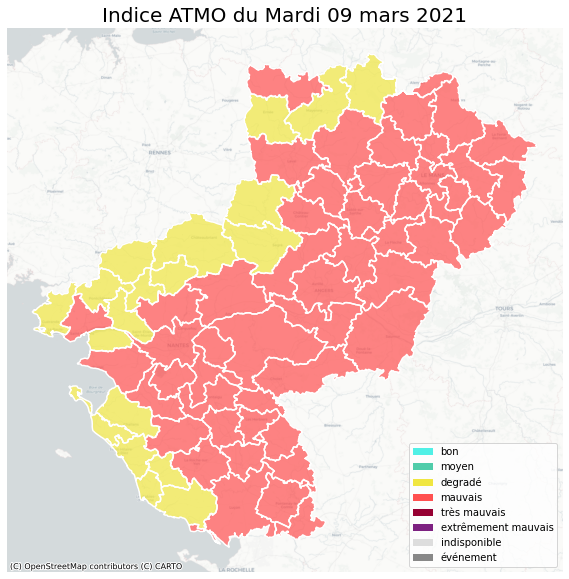

In [9]:
from matplotlib.patches import Patch
# Création de la carte
fig, ax = plt.subplots(figsize=(20,10))
data.to_crs('EPSG:3857').boundary.plot(ax=ax, color='white')
data.to_crs('EPSG:3857').plot(ax=ax, color=data.couleur, alpha=0.7, legend=True)
cx.add_basemap(ax=ax, crs='EPSG:3857', source=cx.providers.CartoDB.Positron)
ax.set_title(f"Indice ATMO du {datetime.strftime(day, '%A %d %B %Y')}", fontsize=20)
ax.set_axis_off()
lgd = ax.legend(
    handles=[
        Patch(
            facecolor=e.get('couleur'),
            edgecolor=None,
            label=e.get('qualificatif')
        ) for e in legendes], loc="lower right")
plt.show()